# Data Loader

In [24]:
import kagglehub
import time

# Download latest version
path = kagglehub.dataset_download("splcher/animefacedataset")

print("Path to dataset files:", path)

Path to dataset files: /home/kifal/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3


Using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


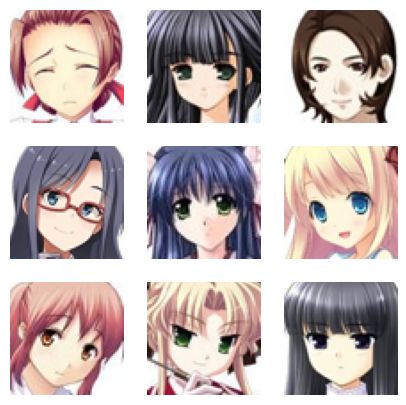

In [25]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("Using GPU:", gpus)
else:
    print("No GPU found. Using CPU.")

# Path to dataset
dataset_path = "/home/kifal/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3/images"

# Ensure dataset path exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path not found: {dataset_path}")

# Image processing settings
IMG_SIZE = 64  # Standard size for DCGAN
BATCH_SIZE = 10 # Process images in batches

# Function to load and preprocess images
def process_image(filename):
    img = Image.open(filename).resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img).astype(np.float32)
    img = (img - 127.5) / 127.5  # Normalize to [-1, 1]
    return img

# Create TensorFlow Dataset
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
dataset = tf.data.Dataset.from_tensor_slices(image_files)

# Load images lazily (on-demand)
dataset = dataset.map(lambda x: tf.numpy_function(process_image, [x], tf.float32), num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Convert dataset into an iterator
iterator = iter(dataset)
batch = next(iterator)

# Display sample images
plt.figure(figsize=(5, 5))
for i in range(min(9, batch.shape[0])):
    plt.subplot(3, 3, i + 1)
    plt.imshow((batch[i] * 127.5 + 127.5).numpy().astype(np.uint8))  # Convert back to [0, 255]
    plt.axis("off")
plt.show()


In [26]:



'''

import os
import numpy as np
import tensorflow as tf
from PIL import Image

# Path to your dataset
dataset_path = "/home/kifal/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3/images"

# Get all image file names
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Image processing settings
IMG_SIZE = 64  # DCGAN usually uses 64x64 images

# Load images, resize, and normalize
image_data = []
for file in image_files:
    img = Image.open(os.path.join(dataset_path, file)).resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img).astype(np.float32)  # Convert to float32
    img = (img - 127.5) / 127.5  # Normalize to [-1, 1]
    image_data.append(img)

# Convert list to NumPy array
image_data = np.array(image_data)

# Convert to TensorFlow tensor and force CPU placement
with tf.device('/CPU:0'):
    image_data_cpu = tf.convert_to_tensor(image_data, dtype=tf.float32)

print(f"Saved {image_data.shape[0]} images in CPU memory")
print("Tensor is stored on:", image_data_cpu.device)  # Should print "/CPU:0"
'''

'\n\nimport os\nimport numpy as np\nimport tensorflow as tf\nfrom PIL import Image\n\n# Path to your dataset\ndataset_path = "/home/kifal/.cache/kagglehub/datasets/splcher/animefacedataset/versions/3/images"\n\n# Get all image file names\nimage_files = [f for f in os.listdir(dataset_path) if f.endswith((\'.png\', \'.jpg\', \'.jpeg\'))]\n\n# Image processing settings\nIMG_SIZE = 64  # DCGAN usually uses 64x64 images\n\n# Load images, resize, and normalize\nimage_data = []\nfor file in image_files:\n    img = Image.open(os.path.join(dataset_path, file)).resize((IMG_SIZE, IMG_SIZE))\n    img = np.array(img).astype(np.float32)  # Convert to float32\n    img = (img - 127.5) / 127.5  # Normalize to [-1, 1]\n    image_data.append(img)\n\n# Convert list to NumPy array\nimage_data = np.array(image_data)\n\n# Convert to TensorFlow tensor and force CPU placement\nwith tf.device(\'/CPU:0\'):\n    image_data_cpu = tf.convert_to_tensor(image_data, dtype=tf.float32)\n\nprint(f"Saved {image_data.shape

In [27]:
''''
'import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset
image_data = np.load("anime_faces_dcgan.npy")

# Split into train and test (optional)
trainX, testX = train_test_split(image_data, test_size=0.2, random_state=42)

# Convert NumPy arrays to TensorFlow tensors and force CPU placement
with tf.device('/CPU:0'):
    x_train_tensor = tf.convert_to_tensor(trainX, dtype=tf.float32)
    x_test_tensor = tf.convert_to_tensor(testX, dtype=tf.float32)

print("Train shape:", trainX.shape)
print("Test shape:", testX.shape)

# Check device placement
print("x_train_tensor is stored on:", x_train_tensor.device)  # Should print "/CPU:0"
print("x_test_tensor is stored on:", x_test_tensor.device)    # Should print "/CPU:0"

# Plot some images (still CPU-based)
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow((trainX[i] ))  # Convert back to [0, 255] range for display
    plt.axis("off")
plt.show()
'''

'\'\n\'import numpy as np\nfrom sklearn.model_selection import train_test_split\nimport tensorflow as tf\nimport matplotlib.pyplot as plt\n\n# Load dataset\nimage_data = np.load("anime_faces_dcgan.npy")\n\n# Split into train and test (optional)\ntrainX, testX = train_test_split(image_data, test_size=0.2, random_state=42)\n\n# Convert NumPy arrays to TensorFlow tensors and force CPU placement\nwith tf.device(\'/CPU:0\'):\n    x_train_tensor = tf.convert_to_tensor(trainX, dtype=tf.float32)\n    x_test_tensor = tf.convert_to_tensor(testX, dtype=tf.float32)\n\nprint("Train shape:", trainX.shape)\nprint("Test shape:", testX.shape)\n\n# Check device placement\nprint("x_train_tensor is stored on:", x_train_tensor.device)  # Should print "/CPU:0"\nprint("x_test_tensor is stored on:", x_test_tensor.device)    # Should print "/CPU:0"\n\n# Plot some images (still CPU-based)\nplt.figure(figsize=(5, 5))\nfor i in range(9):\n    plt.subplot(3, 3, i + 1)\n    plt.imshow((trainX[i] ))  # Convert back 

(32, 100)
(32, 100)


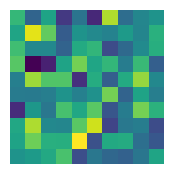

In [28]:
from tensorflow.keras import layers

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils import plot_model

def generate_noise(z_dim,batch_size):
    noise = tf.random.normal(shape=(batch_size,z_dim))
    print(noise.shape)
    return noise 
import matplotlib.pyplot as plt
batch = generate_noise(100,32)
print(batch.shape)
for i in range(1):  
    plt.figure(figsize=(2, 2))
    plt.imshow(batch[i].numpy().reshape(10,10)) 
    plt.axis('off')  
    plt.show()

/home/kifal/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8192)           │       819,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8192)           │        32,768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 4, 4, 512)      │     6,553,600 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 8, 8, 256)      │     3,276,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 16, 16, 128)    │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 64)     │        73,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 3)      │         1,728 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,580,864 (44.18 MB)

 Trainable params: 11,562,560 (44.11 MB)

 Non-trainable params: 18,304 (71.50 KB)

(16, 64, 64, 3)
You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


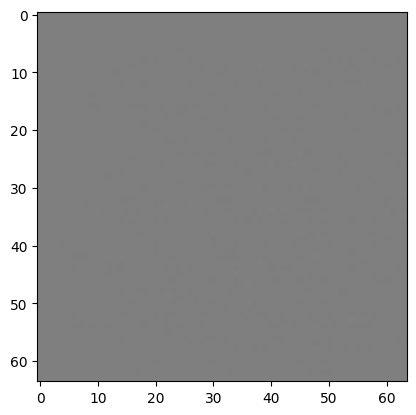

In [29]:
def build_generator():
    model=tf.keras.Sequential()
    model.add(layers.Dense(4*4*512,use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((4,4,512)))
    
    model.add(layers.Conv2DTranspose(512, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same', use_bias=False,activation='tanh'))
    model.summary()
    
    return model




generator = build_generator()

noise = tf.random.normal([16, 100])
generated_image = generator(noise, training=False)
print(generated_image.shape)
plt.imshow((generated_image[0] + 1) / 2)  # Rescale from [-1, 1] to [0, 1]
plottingmodel = tf.keras.utils.plot_model(
    model=generator,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=False,
    show_trainable=False,
    )

In [30]:
def build_discriminator():
    model= tf.keras.Sequential()
    model.add(layers.Conv2D(128 , kernel_size=(5,5) , strides=(2,2) , padding='same' ,  input_shape=[64,64, 3] ))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256 , kernel_size=(5,5) , strides=(2,2) , padding='same' ))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(512 , kernel_size=(5,5) , strides=(2,2) , padding='same'  ))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(1024 , kernel_size=(5,5) , strides=(1,1) , padding='same'  ))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    
    model.summary()
    return model


discriminator=build_discriminator()



/home/kifal/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 1024)     │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 8, 8, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        65,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,280,257 (65.92 MB)

 Trainable params: 17,280,257 (65.92 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
discriminator = build_discriminator()
decision = discriminator(generated_image)
print (decision)
print(decision.shape)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 1024)     │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 8, 8, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        65,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,280,257 (65.92 MB)

 Trainable params: 17,280,257 (65.92 MB)

 Non-trainable params: 0 (0.00 B)

tf.Tensor(
[[2.54262413e-04]
 [1.10233057e-04]
 [7.77991299e-05]
 [1.24911938e-04]
 [2.22074523e-04]
 [1.46775274e-04]
 [2.02981988e-04]
 [1.00293153e-04]
 [1.64263736e-04]
 [1.05655861e-04]
 [4.98899499e-05]
 [1.06853826e-04]
 [1.21024364e-04]
 [2.03085772e-04]
 [2.97457271e-04]
 [1.96036272e-04]], shape=(16, 1), dtype=float32)
(16, 1)


In [32]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True )

In [33]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [34]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [35]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [36]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [37]:
EPOCHS = 1000
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [38]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [39]:
from IPython import display  # Required for clear_output

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    real_images = next(iter(dataset))  # Get a batch of real images

    generate_and_save_images(generator, epoch + 1, seed, real_images)


    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [40]:
import math

def generate_and_save_images(model, epoch, test_input, real_images):
    predictions = model(test_input, training=False)

    batch_size = min(real_images.shape[0], predictions.shape[0])  # Match sizes
    grid_size = math.ceil(math.sqrt(batch_size * 2))  # Adjust grid for real & fake

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size, grid_size))

    for i in range(batch_size):
        # Show real images
        ax = axes[i // grid_size, i % grid_size]
        ax.imshow((real_images[i] + 1) / 2)  # Convert back to [0,1] for display
        ax.set_title("Real")
        ax.axis("off")

        # Show fake images
        ax = axes[(i + batch_size) // grid_size, (i + batch_size) % grid_size]
        ax.imshow((predictions[i] + 1) / 2)  # Convert from [-1,1] to [0,1]
        ax.set_title("Fake")
        ax.axis("off")

    plt.tight_layout()
    plt.savefig(f'image_comparison_epoch_{epoch:04d}.png')
    plt.show()


In [41]:
tf.keras.backend.clear_session()


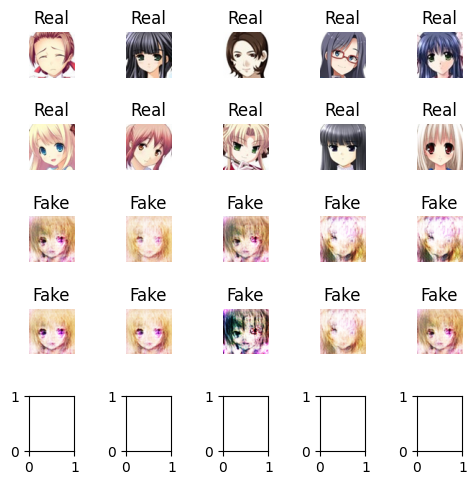

Time for epoch 4 is 298.78225684165955 sec


In [ ]:
train_dataset = dataset

train(train_dataset, EPOCHS)